# K Means clustering

In [1]:
# import modules
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

In [2]:
# read clust_data
df = pd.read_csv('clust_data.csv')

In [3]:
data = df.values

In [4]:
# view the first five rows of df
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50
0,1.448417,2.194434,0.253484,3.271674,1.784326,1.314152,2.349716,1.912047,2.226564,3.388439,...,0.903844,1.825982,-1.000929,2.849224,1.959302,2.571741,4.200965,2.580996,3.321925,1.569531
1,2.611821,2.880855,1.036606,3.449158,3.062979,1.429632,1.996817,0.843128,2.421644,2.155107,...,2.049050,2.515668,1.333777,1.550993,0.448455,2.386328,4.044751,2.768179,2.216161,1.742731
2,4.764148,3.163216,1.323310,4.827628,2.620347,2.579631,2.464886,-1.033376,2.004838,3.737990,...,0.801504,1.765635,2.171325,3.643009,3.167170,0.975322,1.996791,2.463768,4.575728,0.236837
3,2.583472,3.406480,1.379676,1.887976,2.673067,1.101041,2.889585,-0.299666,2.618984,1.920240,...,2.190019,1.341497,3.059539,3.483194,1.726354,1.775252,4.848482,1.114224,3.642899,2.460097
4,1.833661,3.639340,1.876556,4.474807,4.633710,1.809670,3.600430,0.142749,2.431134,1.973526,...,3.297706,3.250237,-0.376862,2.993644,1.532155,3.179516,2.333227,0.900219,3.089761,1.360005


## (a) apply k-means to the data 15 times, find the optimal number of centers

In [5]:
# apply k-means to the data 15 times
K = 15
inertia = np.zeros(15)
for i in range(1,K+1):
    # initialize the model
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=10)
    # fit the data
    kmeans.fit(data)
    assignments = kmeans.predict(data)
    # store inertia in inertia array
    centers = np.ndarray((i, data.shape[-1]))
    for cluster in range(i):
        #update centers
        centers[cluster, :] = data[assignments == cluster].mean(0)
        inertia[i-1] += ((data[assignments == cluster] - centers[cluster]) ** 2).sum()#distance sum of square

The elbow point occurs at k=4. Hence, 4 clusters should be used for this data.


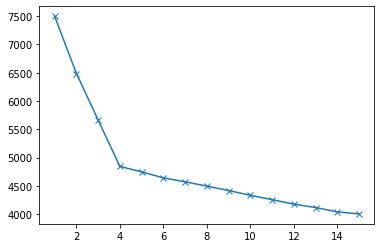

In [6]:
# plot inertia against the number of centers
plt.plot(range(1,K+1),inertia,"-x")
print("The elbow point occurs at k=4. Hence, 4 clusters should be used for this data.")

## (b) Re-apply k-means using the chosen number of centers

In [7]:
# reapply k-means with the chosen number of centers
kmeans = KMeans(n_clusters = 4, random_state=0, n_init=10)
kmeans.fit(data)
# count observations in each cluster
assignments = kmeans.predict(data)
cluster_id, cluster_count= np.unique(assignments, return_counts=True)
# calculate inertia
inertia = 0
for cluster in range(4):
    centers = data[assignments == cluster].mean(0)
    inertia += ((data[assignments==cluster] - centers) ** 2).sum()
# print out the results
for i in range(len(cluster_count)):
    print("Cluster %d has %d observations."%(i+1, cluster_count[i]))
print("Value of inertia is: %f"%(inertia))

Cluster 1 has 25 observations.
Cluster 2 has 25 observations.
Cluster 3 has 25 observations.
Cluster 4 has 25 observations.
Value of inertia is: 4844.925818


## (c) Visualization

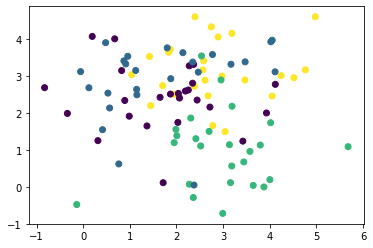

In [8]:
# visualize the data
plt.scatter(data[:,0], data[:,1], c=assignments)

From the graph, it is not a good clustering. We are only using the first 2 varaibles, hence the scatter plot might not be reliable. 